<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_3_06_Lab2St.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2 (Module 3 Lab 2)**

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split.
- Use the LinearRegression class to learn a regression model on this data.
- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).
​
2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression,
- Apply Ridge and do grid search
- Apply Lasso and do grid search
- Visualize the coefficients.

### **1.Hourly Bike Rentals in the Citybike Platform (bike_day_raw.csv)**

#### **1.1. Loading the dataset bike_day_raw.csv, which has the regression target cnt**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('bike_day_raw.csv')
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
df.shape


(731, 11)

In [ ]:
df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


#### 1.2. **Splitting the data into a training and a test set using train_test_split.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# extract the features and target
X = df.drop(['cnt'], axis=1)
y = df['cnt']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **1.3. Using the LinearRegression class to learn a regression model on this data.**

In [ ]:
# initialize a Linear Regression model and fit on the training set
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predict on the testing set and evaluate performance using R^2 score
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R^2 score: 0.48391181320079213


#### **1.4. Evaluating the performance of the model using the R^2 score:**

In [ ]:
# predict on the testing set and evaluate performance using R^2 score
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R^2 score: 0.5518626278474863


#### **1.5. Using the mean_squared_error function to calculate the mean squared error (MSE) between the predicted and actual target values**

In [ ]:
from sklearn.metrics import mean_squared_error

# predict on the testing set and evaluate performance using mean squared error
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1796978.1114466994


#### **1.6. Calculating the R^2 score and the mean squared error using Numpy**

In [ ]:
import numpy as np

# Predict the target variable for the test set using the trained model
y_pred = lin_reg.predict(X_test)

# Calculate the R^2 score
ss_res = np.sum(np.square(y_test - y_pred))
ss_tot = np.sum(np.square(y_test - np.mean(y_test)))
r2 = 1 - (ss_res / ss_tot)
print("R^2 score:", r2)

# Calculate the mean squared error
mse = np.mean(np.square(y_test - y_pred))
print("Mean Squared Error:", mse)


R^2 score: -1354.585284080717
Mean Squared Error: 7489063.093748642


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


- ss_res is the sum of squared residuals (i.e., the sum of squared differences between the predicted and actual values of the target variable),
- ss_tot is the total sum of squares (i.e., the sum of squared differences between the actual values of the target variable and their mean). 
- The R^2 score is then calculated as 1 minus the ratio of ss_res and ss_tot.
- The mean squared error is simply the mean of the squared residuals.

### **2. Diabetes**

Load the diabetes dataset using sklearn.datasets.load_diabetes.

Scale the dataset (you can be creative and make pipelines)

Apply LinearRegression,

Apply Ridge and do grid search

Apply Lasso and do grid search

Visualize the coefficients.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#### **2.1. Loading the dataset**

In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

####**2.2. Scaling using Pipeline**

In [ ]:
# define the scaling pipeline
scaling_pipeline = Pipeline([
    ('scaler', StandardScaler())])

# scale the features
X_scaled = scaling_pipeline.fit_transform(X)

####**2.3. Apply LinearRegression**

In [ ]:
# define the linear regression model
lin_reg = LinearRegression()

# fit the linear regression model
lin_reg.fit(X_scaled, y)

LinearRegression()

####**2.4. Apply Ridge and do grid search**

In [ ]:
# define the Ridge regression model
ridge_reg = Ridge()

# define the parameter grid for Ridge regression
param_grid = {'alpha': [0.1, 1, 10, 100]}

# perform grid search with Ridge regression
ridge_grid = GridSearchCV(ridge_reg, param_grid, cv=5)
ridge_grid.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]})

####**2.5. Apply Lasso and do grid search**

In [ ]:
# define the Lasso regression model
lasso_reg = Lasso()

# define the parameter grid for Lasso regression
param_grid = {'alpha': [0.1, 1, 10, 100]}

# perform grid search with Lasso regression
lasso_grid = GridSearchCV(lasso_reg, param_grid, cv=5)
lasso_grid.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100]})

####**2.6. Visualizing the coefficients**

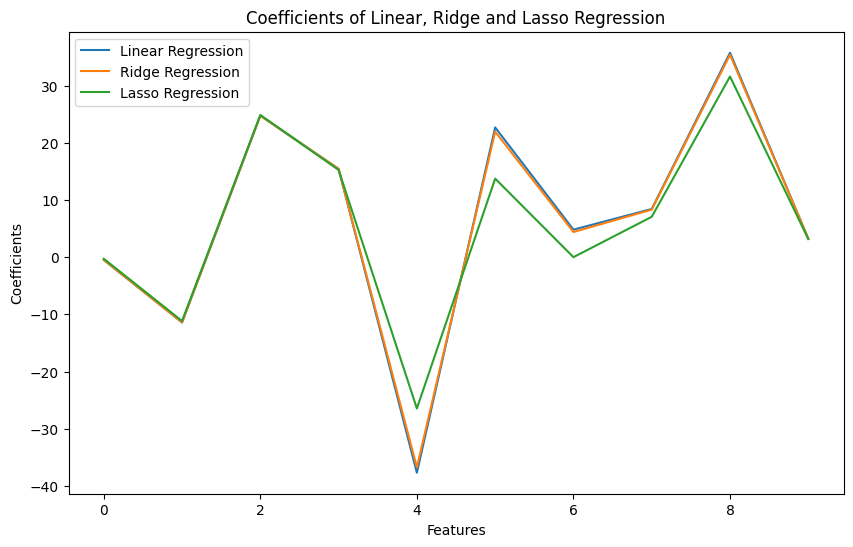

In [ ]:
# plot the coefficients of each model
fig, ax = plt.subplots(figsize=(10, 6))

# plot linear regression coefficients
ax.plot(lin_reg.coef_, label='Linear Regression')

# plot Ridge regression coefficients
ax.plot(ridge_grid.best_estimator_.coef_, label='Ridge Regression')

# plot Lasso regression coefficients
ax.plot(lasso_grid.best_estimator_.coef_, label='Lasso Regression')

# add legend and labels
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients of Linear, Ridge and Lasso Regression')
plt.show()

## **Module 3 Lab 2 Solution**

### Module 3 Lab 2 Solution

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("bike_day_raw.csv")
X = data.drop("cnt", axis=1)
y = data.cnt

display(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_train, y_train))
ybar = numpy.sum(y_train)/len(y_train)          # or sum(y)/len(y)
ssreg = numpy.sum((lr.predict(X_train)-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = numpy.sum((y_train - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
print(ssreg / sstot)

print(lr.score(X_test, y_test))


0.5328925529498699
0.5328925529498698
0.4991033756876271


2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


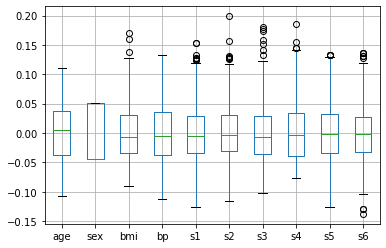

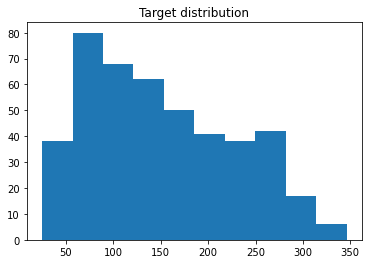

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()

# create dataframe for easy boxplot
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.boxplot()

plt.figure()
plt.title("Target distribution")
plt.hist(diabetes.target, bins="auto")

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target)


Linear regression w/ scaling: 0.46894845696632537
Ridge regression w/ scaling: 0.47052967021791836


Text(0.5, 1.0, 'Ridge grid search')

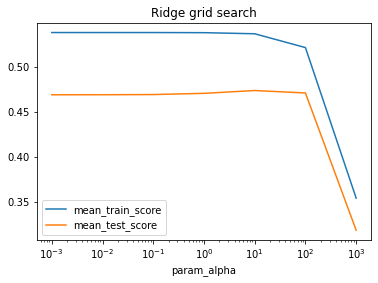

In [ ]:

# With scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
print("Linear regression w/ scaling:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
print("Ridge regression w/ scaling:", scores_ridge.mean())

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search")


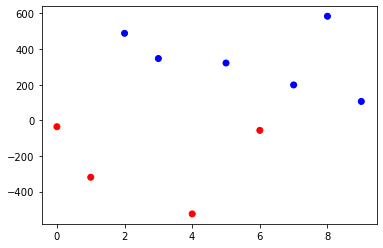

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")


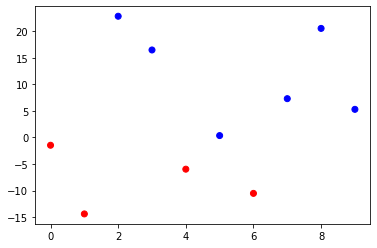

In [ ]:
ridge = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")


In [ ]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)

{'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])}


In [ ]:
grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

/Users/gceran/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=10, estimator=Lasso(max_iter=1000000.0, normalize=True),
             iid=False,
             param_grid={'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])},
             return_train_score=True)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.1}
0.47667873696118457


In [ ]:
grid.score(X_test, y_test)

0.43083075264606996

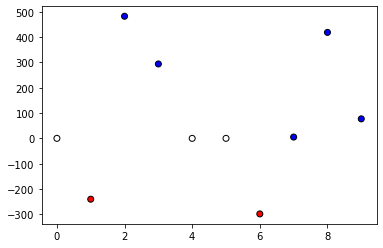

In [ ]:
lasso = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
